
# **나의 해방일지**

---

# 12월 16일 <br>

Stage 3: inference<br><br>
FCN 모델을 inference 해보았다.
<br><br>

결론: 대부분의 숫자를 잘 맞추지 못하였다.

In [1]:
import torch
from torch import nn
from torchvision import datasets, transforms 
import numpy as np
import matplotlib.pyplot as plt
import torchvision.models as models
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%config InlineBackend.figure_format='retina'

In [4]:
torch.manual_seed(316)

In [5]:
class fcn(nn.Module):

    def __init__(self):
        super().__init__()
         
        self.linear = nn.Sequential(
            nn.Linear(784, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Linear(128, 64)
        )
 
    def forward(self, x):
        model = self.linear(x)
        return model

model = fcn()
print(model)

fcn(
  (linear): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=256, bias=True)
    (4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=128, bias=True)
    (7): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=128, out_features=64, bias=True)
  )
)


In [6]:
model.load_state_dict(
    torch.load("/content/drive/MyDrive/model_1211.pth", map_location=torch.device("cpu"))
)
model.eval()

fcn(
  (linear): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=256, bias=True)
    (4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=128, bias=True)
    (7): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=128, out_features=64, bias=True)
  )
)

In [8]:
img_mean = [0.1307]
img_std = [0.3081]

transform = transforms.Compose(
  [
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize(img_mean, img_std),
] )

In [9]:
data_dir = "/content/drive/MyDrive/E02_data"
batch_size = 1

testset = datasets.ImageFolder(os.path.join(data_dir, "test"), transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size)

In [10]:
idx_to_class = { v:k for k, v in testset.class_to_idx.items() } 
idx_to_class

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9'}

In [21]:
image, label_correct = testloader.dataset[1]

In [22]:
label_correct = idx_to_class[label_correct]
label_correct

'0'

In [23]:
image.shape

torch.Size([1, 28, 28])

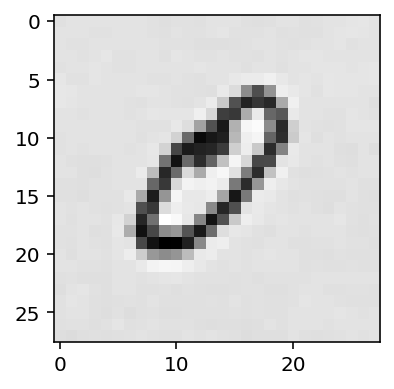

In [24]:
with torch.no_grad():
  image_batch = image.unsqueeze(0)
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,3))
  ax = np.ravel(ax)
  ax[0].imshow(image_batch.squeeze(), cmap="gray")
  plt.show()
  
  logits = model.forward(image_batch.view(-1,784))
  probabilities = logits.softmax(dim=1)
  top_probs, top_classes = probabilities.topk(k=10, dim=1)  

In [25]:
top_probs.squeeze().numpy()

array([7.5555444e-01, 2.4434984e-01, 8.9363501e-05, 5.5169385e-06,
       7.6030324e-07, 1.3074100e-07, 9.4511945e-09, 9.8680863e-10,
       3.3082440e-11, 6.5348521e-12], dtype=float32)

In [26]:
top_classes.squeeze().numpy()

array([7, 2, 3, 6, 0, 8, 5, 9, 1, 4])

In [27]:
label_predicted = idx_to_class[int(top_classes.squeeze()[0])]
label_predicted

'7'

Predicted : 7
Ground Truth : 0


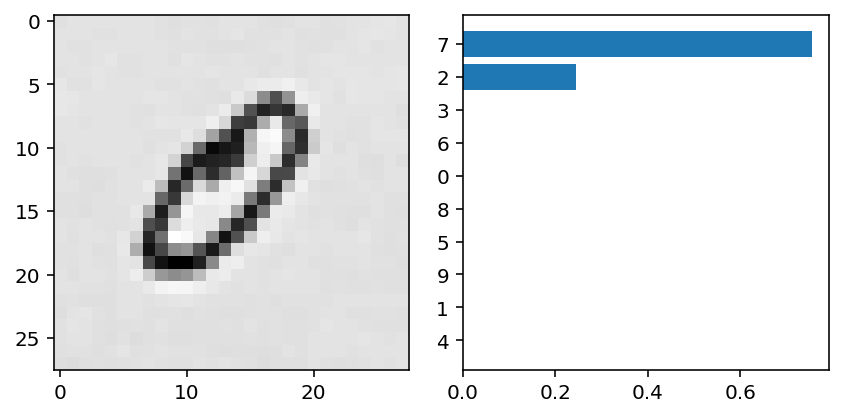

Accuracy: 0.0


In [28]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6,3))
ax = np.ravel(ax)
print(f"Predicted : {label_predicted}") 
print(f"Ground Truth : {label_correct}")
ax[0].imshow(image.squeeze(), cmap="gray")
labels = [idx_to_class[x] for x in top_classes.squeeze().numpy()]
probs = top_probs.squeeze().numpy()
ax[1].barh(np.arange(len(labels)), probs)
ax[1].set_yticks(np.arange(len(labels)))
ax[1].set_yticklabels(labels)
ax[1].invert_yaxis()
plt.tight_layout()
plt.show()
print("Accuracy:",round(float(top_probs.squeeze().numpy()[top_classes.squeeze().numpy() == 0]), 3))